In [1]:
import numpy as np
import gym
from ray.rllib.models import ModelCatalog
from ray.rllib.models.tf.tf_modelv2 import TFModelV2
from ray.rllib.models.tf.fcnet_v2 import FullyConnectedNetwork
from gym.spaces import Discrete, Box
# https://ray.readthedocs.io/en/latest/rllib-env.html
from ray.rllib.agents import ppo
import time
import ray
from ray import tune
from ray.rllib.utils import try_import_tf
# from ray.tune import grid_search, register_env
from ray import tune
import or_gym
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('cmu_paper')

In [3]:
from or_gym.envs.classic_or.knapsack import KnapsackEnv
# from gym import spaces

In [3]:
def create_env(config_env):
#     env = gym.make(config_env["version"])
    return KnapsackEnv()

tf = try_import_tf()

class CustomModel(TFModelV2):
    """Example of a custom model that just delegates to a fc-net."""

    def __init__(self, obs_space, action_space, num_outputs, model_config,
                 name):
        super(CustomModel, self).__init__(obs_space, action_space, num_outputs,
                                          model_config, name)
        self.model = FullyConnectedNetwork(obs_space, action_space,
                                           num_outputs, model_config, name)
        self.register_variables(self.model.variables())

    def forward(self, input_dict, state, seq_lens):
        return self.model.forward(input_dict, state, seq_lens)

    def value_function(self):
        return self.model.value_function()

# Can also register the env creator function explicitly with:
# register_env("Knapsack-v0", create_env)
# register_env("Knapsack-v0", create_env)
register_env("Knapsack-v0", lambda config: create_env(config))
ray.init(ignore_reinit_error=True)
ModelCatalog.register_custom_model("my_model", CustomModel)
x = tune.run(
    "PPO",
    stop={
        "timesteps_total": 10000,
    },
    config={
        "env": "Knapsack-v0",  # or "corridor" if registered above
        "model": {
            "custom_model": "my_model",
        },
        "env_config": {
            "version": "Knapsack-v0"
#             "corridor_length": 5,
        },
        "vf_share_layers": True,
        "lr": grid_search([1e-2, 1e-4, 1e-6]),  # try different lrs
        "num_workers": 1,  # parallelism
    },
)

2020-03-18 12:43:35,388	WARNING services.py:597 -- setpgrp failed, processes may not be cleaned up properly: [Errno 1] Operation not permitted.
2020-03-18 12:43:35,391	INFO resource_spec.py:216 -- Starting Ray with 5.47 GiB memory available for workers and up to 2.74 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-03-18 12:43:35,986	INFO ray_trial_executor.py:121 -- Trial PPO_Knapsack-v0_fe59ae78: Setting up new remote runner.


Trial name,status,loc,lr
PPO_Knapsack-v0_fe59ae78,RUNNING,,
PPO_Knapsack-v0_fe5ac8a8,PENDING,,
PPO_Knapsack-v0_fe5c0e8e,PENDING,,


2020-03-18 12:43:36,151	INFO ray_trial_executor.py:121 -- Trial PPO_Knapsack-v0_fe5ac8a8: Setting up new remote runner.
2020-03-18 12:43:36,204	INFO ray_trial_executor.py:121 -- Trial PPO_Knapsack-v0_fe5c0e8e: Setting up new remote runner.


(pid=27460) /home/christian/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
(pid=27460)   _np_qint8 = np.dtype([("qint8", np.int8, 1)])
(pid=27460) /home/christian/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
(pid=27460)   _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
(pid=27460) /home/christian/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
(pid=27460)   _np_qint16 = np.dtype([("qint16", np.int16, 1)])
(

(pid=27583) /home/christian/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
(pid=27583)   _np_qint8 = np.dtype([("qint8", np.int8, 1)])
(pid=27583) /home/christian/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
(pid=27583)   _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
(pid=27583) /home/christian/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
(pid=27583)   _np_qint16 = np.dtype([("qint16", np.int16, 1)])
(

(pid=27457) WARNING:tensorflow:From /home/christian/anaconda3/lib/python3.6/site-packages/ray/rllib/models/tf/tf_action_dist.py:68: calling reduce_max (from tensorflow.python.ops.math_ops) with keep_dims is deprecated and will be removed in a future version.
(pid=27457) Instructions for updating:
(pid=27457) keep_dims is deprecated, use keepdims instead
(pid=27457) WARNING:tensorflow:From /home/christian/anaconda3/lib/python3.6/site-packages/ray/rllib/models/tf/tf_action_dist.py:73: calling reduce_sum (from tensorflow.python.ops.math_ops) with keep_dims is deprecated and will be removed in a future version.
(pid=27457) Instructions for updating:
(pid=27457) keep_dims is deprecated, use keepdims instead
(pid=27583) /home/christian/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:112: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
(pid=27583)   "Converting sparse IndexedSlices to a d

Trial name,status,loc,lr,iter,total time (s),timesteps,reward
PPO_Knapsack-v0_fe59ae78,RUNNING,,,,,,
PPO_Knapsack-v0_fe5ac8a8,RUNNING,192.168.0.11:27456,0.0001,1,12.6537,4000,257.057
PPO_Knapsack-v0_fe5c0e8e,RUNNING,,,,,,


Result for PPO_Knapsack-v0_fe5c0e8e:
  custom_metrics: {}
  date: 2020-03-18_12-43-56
  done: false
  episode_len_mean: 20.5979381443299
  episode_reward_max: 408.0
  episode_reward_mean: 254.70103092783506
  episode_reward_min: 139.0
  episodes_this_iter: 194
  episodes_total: 194
  experiment_id: c8495e0e3a56485b8ca97373414c703c
  experiment_tag: 2_lr=1e-06
  hostname: ubuntu
  info:
    grad_time_ms: 8268.229
    learner:
      default_policy:
        cur_kl_coeff: 0.20000000298023224
        cur_lr: 9.999999974752427e-07
        entropy: 5.297817230224609
        entropy_coeff: 0.0
        kl: 0.00047945210826583207
        policy_loss: -0.008729815483093262
        total_loss: 19576.02734375
        vf_explained_var: 0.0001884756493382156
        vf_loss: 19576.037109375
    load_time_ms: 78.951
    num_steps_sampled: 4000
    num_steps_trained: 3968
    sample_time_ms: 4472.245
    update_time_ms: 313.01
  iterations_since_restore: 1
  node_ip: 192.168.0.11
  num_healthy_workers:

Trial name,status,loc,lr,iter,total time (s),timesteps,reward
PPO_Knapsack-v0_fe59ae78,RUNNING,192.168.0.11:27460,0.01,1,12.9325,4000,255.366
PPO_Knapsack-v0_fe5ac8a8,RUNNING,192.168.0.11:27456,0.0001,2,25.0767,8000,279.141
PPO_Knapsack-v0_fe5c0e8e,RUNNING,192.168.0.11:27458,1e-06,1,13.1705,4000,254.701


(pid=27456) 2020-03-18 12:44:08,606	WARNING ppo.py:129 -- The magnitude of your value function loss is extremely large (19030.955078125) compared to the policy loss (-0.049312278628349304). This can prevent the policy from learning. Consider scaling down the VF loss by reducing vf_loss_coeff, or disabling vf_share_layers.
Result for PPO_Knapsack-v0_fe5c0e8e:
  custom_metrics: {}
  date: 2020-03-18_12-44-08
  done: false
  episode_len_mean: 20.637305699481864
  episode_reward_max: 448.0
  episode_reward_mean: 257.35751295336786
  episode_reward_min: 154.0
  episodes_this_iter: 193
  episodes_total: 387
  experiment_id: c8495e0e3a56485b8ca97373414c703c
  experiment_tag: 2_lr=1e-06
  hostname: ubuntu
  info:
    grad_time_ms: 8533.325
    learner:
      default_policy:
        cur_kl_coeff: 0.10000000149011612
        cur_lr: 9.999999974752427e-07
        entropy: 5.296500205993652
        entropy_coeff: 0.0
        kl: 0.0008963444852270186
        policy_loss: -0.009059981442987919
    

Trial name,status,loc,lr,iter,total time (s),timesteps,reward
PPO_Knapsack-v0_fe59ae78,RUNNING,192.168.0.11:27460,0.01,2,25.6567,8000,74.0862
PPO_Knapsack-v0_fe5ac8a8,TERMINATED,,0.0001,3,41.5581,12000,309.663
PPO_Knapsack-v0_fe5c0e8e,RUNNING,192.168.0.11:27458,1e-06,2,25.7399,8000,257.358


Result for PPO_Knapsack-v0_fe5c0e8e:
  custom_metrics: {}
  date: 2020-03-18_12-44-25
  done: true
  episode_len_mean: 20.787564766839377
  episode_reward_max: 427.0
  episode_reward_mean: 263.3056994818653
  episode_reward_min: 174.0
  episodes_this_iter: 193
  episodes_total: 580
  experiment_id: c8495e0e3a56485b8ca97373414c703c
  experiment_tag: 2_lr=1e-06
  hostname: ubuntu
  info:
    grad_time_ms: 9226.938
    learner:
      default_policy:
        cur_kl_coeff: 0.05000000074505806
        cur_lr: 9.999999974752427e-07
        entropy: 5.2945942878723145
        entropy_coeff: 0.0
        kl: 0.0009618721669539809
        policy_loss: -0.012461169622838497
        total_loss: 21163.23828125
        vf_explained_var: 7.435391307808459e-05
        vf_loss: 21163.25
    load_time_ms: 41.499
    num_steps_sampled: 12000
    num_steps_trained: 11904
    sample_time_ms: 4708.327
    update_time_ms: 108.008
  iterations_since_restore: 3
  node_ip: 192.168.0.11
  num_healthy_workers: 1
 

Trial name,status,loc,lr,iter,total time (s),timesteps,reward
PPO_Knapsack-v0_fe59ae78,TERMINATED,,0.01,3,42.1494,12000,83.4502
PPO_Knapsack-v0_fe5ac8a8,TERMINATED,,0.0001,3,41.5581,12000,309.663
PPO_Knapsack-v0_fe5c0e8e,TERMINATED,,1e-06,3,42.3256,12000,263.306


2020-03-18 12:44:25,652	INFO tune.py:334 -- Returning an analysis object by default. You can call `analysis.trials` to retrieve a list of trials. This message will be removed in future versions of Tune.


(pid=27460) 2020-03-18 12:44:25,617	WARNING ppo.py:129 -- The magnitude of your value function loss is extremely large (820.9906616210938) compared to the policy loss (0.051914095878601074). This can prevent the policy from learning. Consider scaling down the VF loss by reducing vf_loss_coeff, or disabling vf_share_layers.


In [13]:
x.dataframe()

,episode_reward_max,episode_reward_min,episode_reward_mean,episode_len_mean,episodes_this_iter,timesteps_this_iter,done,timesteps_total,episodes_total,training_iteration,...,info/learner/default_policy/kl,info/learner/default_policy/entropy,info/learner/default_policy/entropy_coeff,config/env,config/env_config,config/lr,config/model,config/num_workers,config/vf_share_layers,logdir
0,351.0,177.0,258.828877,21.385027,187,4000,True,12000,571,3,...,0.197311,2.035856,0.0,Knapsack-v0,{'version': 'Knapsack-v0'},0.010000,{'custom_model': 'my_model'},1,True,/home/christian/ray_results/PPO/PPO_Knapsack-v...
1,511.0,176.0,304.865922,22.418994,179,4000,True,12000,556,3,...,0.027375,5.177581,0.0,Knapsack-v0,{'version': 'Knapsack-v0'},0.000100,{'custom_model': 'my_model'},1,True,/home/christian/ray_results/PPO/PPO_Knapsack-v...
2,380.0,134.0,262.000000,20.701031,194,4000,True,12000,582,3,...,0.001136,5.294332,0.0,Knapsack-v0,{'version': 'Knapsack-v0'},0.000001,{'custom_model': 'my_model'},1,True,/home/christian/ray_results/PPO/PPO_Knapsack-v...


In [9]:
ray.init(ignore_reinit_error=True)
# knapsack_env = gym.make('Knapsack-v0')
trainer = ppo.PPOTrainer(env=KnapsackEnv, 
    config={
    "env_config": {"reuse_actors":True}})

2020-03-18 13:11:16,866	ERROR worker.py:679 -- Calling ray.init() again after it has already been called.
2020-03-18 13:11:20,025	WARNING util.py:45 -- Install gputil for GPU system monitoring.


In [4]:
# Get Ray to work with gym registry
def create_env(env_name):
    if env_name == 'Knapsack-v0':
        from or_gym.envs.classic_or.knapsack import KnapsackEnv as env
    elif env_name == 'Knapsack-v1':
        from or_gym.envs.classic_or.knapsack import BoundedKnapsackEnv as env
    elif env_name == 'Knapsack-v2':
        from or_gym.envs.classic_or.knapsack import OnlineKnapsackEnv as env
    else:
        raise NotImplementedError('Environment {} not recognized.'.format(env_name))
    return env

In [5]:
ray.init(ignore_reinit_error=True)
env_name = 'Knapsack-v0'
trainer = ppo.PPOTrainer(env=create_env(env_name), 
    config={
    "env_config": {"reuse_actors":True}})

2020-03-18 13:45:25,801	ERROR worker.py:679 -- Calling ray.init() again after it has already been called.
2020-03-18 13:45:25,805	INFO trainer.py:371 -- Tip: set 'eager': true or the --eager flag to enable TensorFlow eager execution
2020-03-18 13:45:25,812	INFO trainer.py:512 -- Current log_level is WARN. For more information, set 'log_level': 'INFO' / 'DEBUG' or use the -v and -vv flags.
2020-03-18 13:45:47,067	INFO trainable.py:102 -- _setup took 21.256 seconds. If your trainable is slow to initialize, consider setting reuse_actors=True to reduce actor creation overheads.
2020-03-18 13:45:47,069	WARNING util.py:45 -- Install gputil for GPU system monitoring.


In [20]:
ray.init(ignore_reinit_error=True)
env_name = 'Knapsack-v0'
trainer = ppo.PPOTrainer(env=create_env(env_name), 
    config={
    "env_config": {"reuse_actors":True},
    "vf_clip_param": 5000,
    "model": {
        "fcnet_activation": "elu",
        "fcnet_hiddens": [128, 128, 128]}
    })

# Run x number of episodes
N_EPS = 1000
rewards = []
eps, eps_total = [], []
training = True
batch = 0
t_start = time.time()
while training:
    t_batch = time.time()
    results = trainer.train()
    rewards.append(results['episode_reward_mean'])
    eps.append(results['episodes_this_iter'])
    eps_total.append(results['episodes_total'])
    batch += 1
    t_end = time.time()
    if sum(eps) >= N_EPS:
        training = False
        break
    if batch % 10 == 0:
        t = t_end - t_batch
        t_tot = t_end - t_start
        print("\rEpisode: {}\tMean Rewards: {:.1f}\tEpisodes/sec: {:.2f}s\tTotal Time: {:.1f}s".format(
            eps_total[-1], rewards[-1], eps[-1]/t, t_tot), end="")
        
print("Total Training Time: {:.1f}s\t".format(t_end - t_start))

2020-03-21 13:13:35,365	ERROR worker.py:679 -- Calling ray.init() again after it has already been called.
2020-03-21 13:13:38,022	WARNING util.py:45 -- Install gputil for GPU system monitoring.


Total Training Time: 31.5s	


In [15]:
trainer.get_config()

{'num_workers': 2,
 'num_envs_per_worker': 1,
 'sample_batch_size': 200,
 'batch_mode': 'truncate_episodes',
 'num_gpus': 0,
 'train_batch_size': 4000,
 'model': {'conv_filters': None,
  'conv_activation': 'relu',
  'fcnet_activation': 'tanh',
  'fcnet_hiddens': [256, 256],
  'free_log_std': False,
  'no_final_linear': False,
  'vf_share_layers': True,
  'use_lstm': False,
  'max_seq_len': 20,
  'lstm_cell_size': 256,
  'lstm_use_prev_action_reward': False,
  'state_shape': None,
  'framestack': True,
  'dim': 84,
  'grayscale': False,
  'zero_mean': True,
  'custom_preprocessor': None,
  'custom_model': None,
  'custom_action_dist': None,
  'custom_options': {}},
 'optimizer': {},
 'gamma': 0.99,
 'horizon': None,
 'soft_horizon': False,
 'no_done_at_end': False,
 'env_config': {'reuse_actors': True},
 'env': 'KnapsackEnv',
 'clip_rewards': None,
 'clip_actions': True,
 'preprocessor_pref': 'deepmind',
 'lr': 5e-05,
 'monitor': False,
 'log_level': 'WARN',
 'callbacks': {'on_episode_s

In [26]:
trainer.export_model(['model'])

TuneError: Unsupported export format: modelyez

In [13]:
rewards

[252.7295918367347,
 252.859375,
 279.8232044198895,
 307.71751412429376,
 330.8070175438597,
 351.9879518072289]

In [39]:
for i in range(10):
     print("\rEpisode: {}\tMean Rewards: {:.1f}\tEpisode/sec: {:.2f}s\tTotal Time: {:.1f}s".format(
            i, i, i, t_tot), end="")

Episode: 9	Mean Rewards: 9.0	Episode/sec: 9.00s	Total Time: 5325.8s

In [40]:
6000 / 60**2

1.6666666666666667

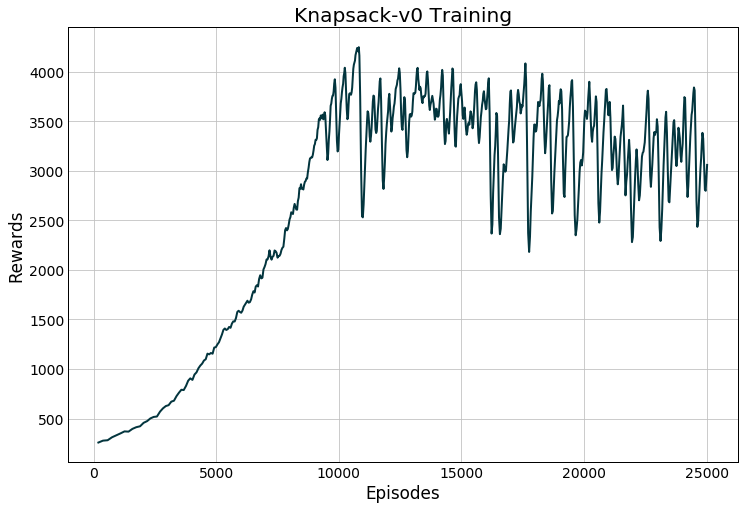

In [37]:
plt.figure(figsize=(12,8))
plt.plot(eps_total, rewards)
plt.xlabel('Episodes')
plt.ylabel('Rewards')
plt.title('{} Training'.format(env_name))
plt.show()

In [20]:
import pandas_datareader as pdr
from datetime import datetime 

In [21]:
data = pdr.DataReader('^GSPC', 'yahoo', start=datetime.strptime('1900-01-01', '%Y-%m-%d'))

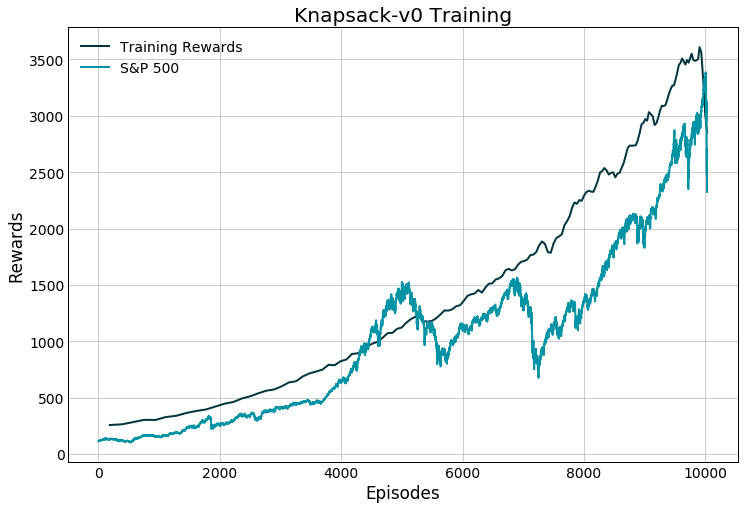

In [33]:
plt.figure(figsize=(12,8))
plt.plot(eps_total, rewards, label='Training Rewards')
plt.plot(np.arange(eps_total[-1]), data.iloc[-eps_total[-1]:]['Close'], label='S&P 500')
plt.xlabel('Episodes')
plt.ylabel('Rewards')
plt.title('{} Training'.format(env_name))
plt.legend()
plt.show()

# Tune

In [2]:
from or_gym.algos import rl_utils

In [3]:
env = gym.make(env_name)
env.spec.id.split('-')[-1]

NameError: name 'env_name' is not defined

In [3]:
env_name = 'Knapsack-v1'
rl_config = rl_utils.check_config(env_name)

In [5]:
from or_gym.envs.classic_or.knapsack import KnapsackEnv

In [7]:
# rl_utils.register_env(env_name, rl_config['env_config'])
ModelCatalog.register_custom_model("my_model", rl_utils.FCModel)
tune.register_env(env_name, lambda config: KnapsackEnv(config))

env = rl_utils.create_env(env_name)
ray.init(ignore_reinit_error=True)
x = tune.run(
    "PPO",
    checkpoint_at_end=True,
    stop={
        "timesteps_total": 10000,
    },
    config={
        "env": rl_utils.create_env(env_name),
        "model": {
            "custom_model": "my_model",
        },
        "env_config": {
            "version": '0'
        },
        "vf_share_layers": True,
        "lr": tune.grid_search([1e-2, 1e-4]),  # try different lrs
        "num_workers": 1,  # parallelism
    },
)
# ray.shutdown()

2020-03-31 20:43:44,813	ERROR worker.py:679 -- Calling ray.init() again after it has already been called.
2020-03-31 20:43:44,833	INFO ray_trial_executor.py:121 -- Trial PPO_BoundedKnapsackEnv_39282500: Setting up new remote runner.


Environment	Knapsack-v1
Environment	Knapsack-v1


Trial name,status,loc,lr
PPO_BoundedKnapsackEnv_39282500,RUNNING,,
PPO_BoundedKnapsackEnv_392862cc,PENDING,,


2020-03-31 20:43:44,857	INFO ray_trial_executor.py:121 -- Trial PPO_BoundedKnapsackEnv_392862cc: Setting up new remote runner.


(pid=7353) 2020-03-31 20:43:47,141	INFO trainer.py:371 -- Tip: set 'eager': true or the --eager flag to enable TensorFlow eager execution
(pid=7353) 2020-03-31 20:43:47,141	INFO trainer.py:512 -- Current log_level is WARN. For more information, set 'log_level': 'INFO' / 'DEBUG' or use the -v and -vv flags.
(pid=7715) 2020-03-31 20:43:47,744	INFO trainer.py:371 -- Tip: set 'eager': true or the --eager flag to enable TensorFlow eager execution
(pid=7715) 2020-03-31 20:43:47,745	INFO trainer.py:512 -- Current log_level is WARN. For more information, set 'log_level': 'INFO' / 'DEBUG' or use the -v and -vv flags.
(pid=7353) 2020-03-31 20:43:49,347	WARNING util.py:45 -- Install gputil for GPU system monitoring.
(pid=7715) 2020-03-31 20:43:50,108	WARNING util.py:45 -- Install gputil for GPU system monitoring.
Result for PPO_BoundedKnapsackEnv_39282500:
  custom_metrics: {}
  date: 2020-03-31_20-44-00
  done: false
  episode_len_mean: 19.96
  episode_reward_max: 371.0
  episode_reward_mean: 24

Trial name,status,loc,lr,iter,total time (s),timesteps,reward
PPO_BoundedKnapsackEnv_39282500,RUNNING,192.168.0.11:7353,0.01,1,10.8161,4000,247.4
PPO_BoundedKnapsackEnv_392862cc,RUNNING,,,,,,


(pid=7353) 2020-03-31 20:44:00,259	WARNING ppo.py:129 -- The magnitude of your value function loss is extremely large (17392.060546875) compared to the policy loss (0.6179311275482178). This can prevent the policy from learning. Consider scaling down the VF loss by reducing vf_loss_coeff, or disabling vf_share_layers.
Result for PPO_BoundedKnapsackEnv_392862cc:
  custom_metrics: {}
  date: 2020-03-31_20-44-01
  done: false
  episode_len_mean: 19.935
  episode_reward_max: 373.0
  episode_reward_mean: 244.67
  episode_reward_min: 42.0
  episodes_this_iter: 200
  episodes_total: 200
  experiment_id: b9b4eb1f994a4f4490efeb8f786c8d2f
  experiment_tag: 1_lr=0.0001
  hostname: ubuntu
  info:
    grad_time_ms: 5209.355
    learner:
      default_policy:
        cur_kl_coeff: 0.20000000298023224
        cur_lr: 9.999999747378752e-05
        entropy: 5.263522624969482
        entropy_coeff: 0.0
        kl: 0.035826537758111954
        policy_loss: -0.04934678226709366
        total_loss: 16263.4

Trial name,status,loc,lr,iter,total time (s),timesteps,reward
PPO_BoundedKnapsackEnv_39282500,RUNNING,192.168.0.11:7353,0.01,2,20.1323,8000,192.693
PPO_BoundedKnapsackEnv_392862cc,RUNNING,192.168.0.11:7715,0.0001,1,11.3033,4000,244.67


Result for PPO_BoundedKnapsackEnv_392862cc:
  custom_metrics: {}
  date: 2020-03-31_20-44-10
  done: false
  episode_len_mean: 20.921465968586386
  episode_reward_max: 392.0
  episode_reward_mean: 273.1675392670157
  episode_reward_min: 54.0
  episodes_this_iter: 191
  episodes_total: 391
  experiment_id: b9b4eb1f994a4f4490efeb8f786c8d2f
  experiment_tag: 1_lr=0.0001
  hostname: ubuntu
  info:
    grad_time_ms: 5252.643
    learner:
      default_policy:
        cur_kl_coeff: 0.30000001192092896
        cur_lr: 9.999999747378752e-05
        entropy: 5.217266082763672
        entropy_coeff: 0.0
        kl: 0.03313721716403961
        policy_loss: -0.0457654669880867
        total_loss: 18323.564453125
        vf_explained_var: 6.6103475546697155e-06
        vf_loss: 18323.6015625
    load_time_ms: 89.68
    num_steps_sampled: 8000
    num_steps_trained: 7936
    sample_time_ms: 4807.763
    update_time_ms: 129.113
  iterations_since_restore: 2
  node_ip: 192.168.0.11
  num_healthy_worke

Trial name,status,loc,lr,iter,total time (s),timesteps,reward
PPO_BoundedKnapsackEnv_39282500,TERMINATED,,0.01,3,29.56,12000,138.167
PPO_BoundedKnapsackEnv_392862cc,RUNNING,192.168.0.11:7715,0.0001,2,20.609,8000,273.168


(pid=7353) 2020-03-31 20:44:19,031	WARNING ppo.py:129 -- The magnitude of your value function loss is extremely large (4524.89453125) compared to the policy loss (0.05322035774588585). This can prevent the policy from learning. Consider scaling down the VF loss by reducing vf_loss_coeff, or disabling vf_share_layers.
Result for PPO_BoundedKnapsackEnv_392862cc:
  custom_metrics: {}
  date: 2020-03-31_20-44-20
  done: true
  episode_len_mean: 21.29787234042553
  episode_reward_max: 434.0
  episode_reward_mean: 291.5
  episode_reward_min: 97.0
  episodes_this_iter: 188
  episodes_total: 579
  experiment_id: b9b4eb1f994a4f4490efeb8f786c8d2f
  experiment_tag: 1_lr=0.0001
  hostname: ubuntu
  info:
    grad_time_ms: 5256.701
    learner:
      default_policy:
        cur_kl_coeff: 0.44999998807907104
        cur_lr: 9.999999747378752e-05
        entropy: 5.160740375518799
        entropy_coeff: 0.0
        kl: 0.028981465846300125
        policy_loss: -0.04547945782542229
        total_loss:

Trial name,status,loc,lr,iter,total time (s),timesteps,reward
PPO_BoundedKnapsackEnv_39282500,TERMINATED,,0.01,3,29.56,12000,138.167
PPO_BoundedKnapsackEnv_392862cc,TERMINATED,,0.0001,3,29.9522,12000,291.5


2020-03-31 20:44:20,185	INFO tune.py:334 -- Returning an analysis object by default. You can call `analysis.trials` to retrieve a list of trials. This message will be removed in future versions of Tune.


(pid=7715) 2020-03-31 20:44:20,154	WARNING ppo.py:129 -- The magnitude of your value function loss is extremely large (18458.259765625) compared to the policy loss (-0.04547945782542229). This can prevent the policy from learning. Consider scaling down the VF loss by reducing vf_loss_coeff, or disabling vf_share_layers.


In [20]:
x._retrieve_rows()

{'/home/christian/ray_results/PPO/PPO_BoundedKnapsackEnv_a7f67826_2020-03-31_20-32-315yicpnk3': {'episode_reward_max': 143.0,
  'episode_reward_min': 60.0,
  'episode_reward_mean': 68.89014084507042,
  'episode_len_mean': 5.6394366197183095,
  'episodes_this_iter': 710,
  'timesteps_this_iter': 4000,
  'done': True,
  'timesteps_total': 12000,
  'episodes_total': 1620,
  'training_iteration': 3,
  'experiment_id': 'd6489a3ff3314c11926804f3617f3739',
  'date': '2020-03-31_20-33-04',
  'timestamp': 1585704784,
  'time_this_iter_s': 8.853796720504759,
  'time_total_s': 27.78766942024231,
  'pid': 6338,
  'hostname': 'ubuntu',
  'node_ip': '192.168.0.11',
  'time_since_restore': 27.78766942024231,
  'timesteps_since_restore': 12000,
  'iterations_since_restore': 3,
  'num_healthy_workers': 1,
  'trial_id': 'a7f67826',
  'experiment_tag': '0_lr=0.01',
  'sampler_perf/mean_env_wait_ms': 0.07082795949789218,
  'sampler_perf/mean_processing_ms': 0.1934549329916782,
  'sampler_perf/mean_inferen

In [9]:
from or_gym.envs.classic_or.knapsack import KnapsackEnv

In [4]:
env_name = 'Knapsack-v0'

def _reg_func(whatever):
    return KnapsackEnv(whatever)

# Can also register the env creator function explicitly with:
# tune.register_env("corridor", lambda config: SimpleCorridor(config))
# tune.register_env(env_name, lambda env_name, config: rl_utils.create_env(env_name, config))
# tune.register_env(env_name, lambda config: _reg_func(config))
tune.register_env(env_name, rl_utils.create_env(env_name))
ray.init(ignore_reinit_error=True)
ModelCatalog.register_custom_model("my_model", rl_utils.FCModel)
# ModelCatalog.register_custom_model("my_model", CustomModel)
results = tune.run(
    "PPO",
    stop={
        "timesteps_total": 10000,
    },
    config={
        "env": env_name,  # or "corridor" if registered above
        "model": {
            "custom_model": "my_model",
        },
        "vf_share_layers": True,
        "lr": tune.grid_search([1e-2, 1e-4, 1e-6]),  # try different lrs
        "num_workers": 1,  # parallelism
        "env_config": {
            "corridor_length": 5,
        },
    },
)
# ray.shutdown()

TypeError: string indices must be integers

In [11]:
results.dataframe()

,episode_reward_max,episode_reward_min,episode_reward_mean,episode_len_mean,episodes_this_iter,timesteps_this_iter,done,timesteps_total,episodes_total,training_iteration,...,info/learner/default_policy/kl,info/learner/default_policy/entropy,info/learner/default_policy/entropy_coeff,config/env,config/env_config,config/lr,config/model,config/num_workers,config/vf_share_layers,logdir
0,501.0,249.0,370.857143,24.863354,161,4000,True,12000,501,3,...,0.212859,2.435821,0.0,Knapsack-v0,{'corridor_length': 5},0.010000,{'custom_model': 'my_model'},1,True,/home/christian/ray_results/PPO/PPO_Knapsack-v...
1,441.0,179.0,307.176796,22.060773,181,4000,True,12000,562,3,...,0.030007,5.166704,0.0,Knapsack-v0,{'corridor_length': 5},0.000100,{'custom_model': 'my_model'},1,True,/home/christian/ray_results/PPO/PPO_Knapsack-v...
2,399.0,160.0,261.569231,20.615385,195,4000,True,12000,578,3,...,0.001218,5.293469,0.0,Knapsack-v0,{'corridor_length': 5},0.000001,{'custom_model': 'my_model'},1,True,/home/christian/ray_results/PPO/PPO_Knapsack-v...


In [3]:
import pandas as pd
df = pd.read_csv('/home/christian/GitHub/or-gym/or_gym/benchmarks/knapsack/results/Knapsack-v0_or_gym_tune2020-03-21.csv')

In [7]:
top = df.loc[df['episode_reward_mean']==df['episode_reward_mean'].max()]

In [17]:
data_path = top['logdir'][1]

In [18]:
train_data = pd.read_csv(data_path + '/progress.csv')
train_data.head()

,episode_reward_max,episode_reward_min,episode_reward_mean,episode_len_mean,episodes_this_iter,timesteps_this_iter,done,timesteps_total,episodes_total,training_iteration,...,perf/ram_util_percent,info/learner/default_policy/cur_kl_coeff,info/learner/default_policy/cur_lr,info/learner/default_policy/total_loss,info/learner/default_policy/policy_loss,info/learner/default_policy/vf_loss,info/learner/default_policy/vf_explained_var,info/learner/default_policy/kl,info/learner/default_policy/entropy,info/learner/default_policy/entropy_coeff
0,431.0,119.0,254.994764,20.884817,191,4000,False,4000,191,1,...,60.425000,0.2000,0.001,1443.28330,0.331381,1441.9069,0.767418,5.224539,3.513715,0.0
1,351.0,116.0,238.981221,18.755869,213,4000,False,8000,404,2,...,61.811111,0.3000,0.001,759.16315,0.203138,758.0068,0.863625,3.177494,2.627722,0.0
2,343.0,175.0,241.663900,16.589212,241,4000,False,12000,645,3,...,61.911111,0.4500,0.001,542.03770,0.073652,541.6869,0.901022,0.616034,1.903424,0.0
3,339.0,188.0,247.663004,14.633700,273,4000,False,16000,918,4,...,61.609091,0.6750,0.001,671.02580,0.007282,670.8704,0.889225,0.219439,1.405271,0.0
4,387.0,201.0,269.405303,15.200758,264,4000,False,20000,1182,5,...,61.080000,1.0125,0.001,879.05390,0.004869,878.9511,0.867222,0.096569,1.414566,0.0


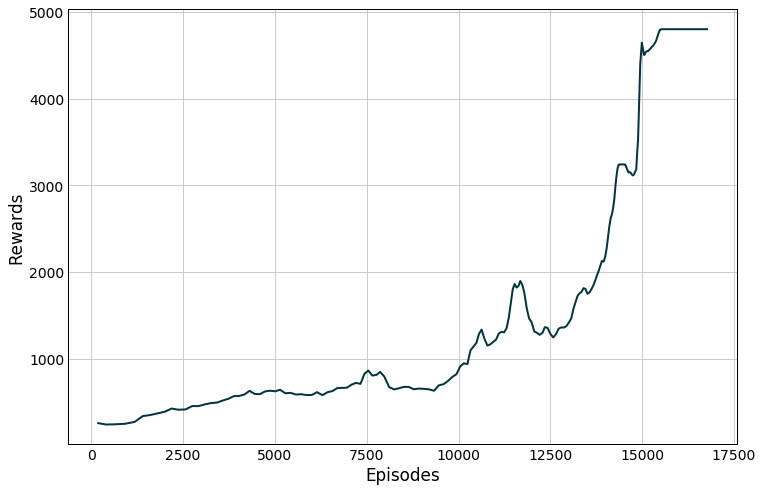

In [21]:
plt.figure(figsize=(12,8))
plt.plot(train_data['episodes_total'], train_data['episode_reward_mean'])
plt.xlabel('Episodes')
plt.ylabel('Rewards')
plt.show()